# Introduction

## Goal
The goal of this lab is to familiarize yourself with Particle Swarm Optimization and study the effect of parametrization on the algorithmic performance.

Note once again that, unless otherwise specified, in this module's exercises we will use real-valued genotypes and that the aim of the algorithms will be to *minimize* the fitness function $f(\mathbf{x})$, i.e. lower values correspond to a better fitness!

## Exercise 1

As a first exercise, we will run a simple 2D Boids simulator, based on the Reynolds' flocking rules we have seen during the lectures. Although this exercise is not strictly related to PSO, it provides a good source of inspiration (and intuition) on how PSO works. 

The simulator allows you to change various aspects of the simulation, specifically the total number of boids, the number of neighbors whose information is collected by each boid (to determine cohesion, alignment, and separation), and the relative weights of each of the 3 flocking rules (behavior coefficients). Spend some time with the simulator, and try different simulation configurations.

To help you figure out the behavior of the boids, you can find below the implementation of the `boid` class extracted from the source code of the simulator. In particular, check the `update` method.

- What is the effect of each behavior coefficient?
- Which combination of coefficients leads to the most ``natural'' flock behavior? 

In [1]:
!pip3 install pygame
import warnings
warnings.filterwarnings('ignore')
from utils.utils_06.main import run
import os
"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""
num_boids = 50   # advice: for graphical reasons avoid to use num_boids > 400
alignment = 0.5  # default: 0.5
cohesion = 0.5   # default: 0.5
separation = 0.5 # default: 0.5

# make sure you are calling the right version of python in the process below
os.popen(f'python3 utils/utils_06/main.py {num_boids} {alignment} {cohesion} {separation}').read()

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 2.4 MB/s eta 0:00:0000:0100:01
pygame 2.3.0 (SDL 2.24.2, Python 3.8.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


'pygame 2.3.0 (SDL 2.24.2, Python 3.8.9)\nHello from the pygame community. https://www.pygame.org/contribute.html\n'

## Exercise 2

In this exercise we will perform a comparative analysis of the results of Genetic Algorithm (as seen in Lab 2), Evolution Strategies (as seen in Lab 3) and Particle Swarm Optimization. 
The script will perform a single run of GA, ES and PSO, on one of the benchmark functions we have seen in the previous labs. As usual, the algorithm parametrization is shown in the code and can be easily modified.

Questions:
-  What kind of behavior does PSO have on different benchmark functions (change the parameter `args["problem_class"]` to try at least a couple of functions), in comparison with the EAs? Does it show better or worse results? Does it converge faster or not?
- What happens if you run the script multiple times? Do the various algorithms (and especially PSO) show consistent behavior?
- Increase the problem dimensionality (`num_vars`, by default set to 2), e.g. to 10 or more. What do you observe in this case?
-  Change the population size (by changing`args["pop_size"]`, by default set to 50) and the number of generations (by changing `args["max_generations"]`, by default set to 100), such that their product is fixed (e.g. $50 \times 100$, $100 \times 100$, etc.). Try two or three different combinations and observe the behavior of the three different algorithms. What do you observe in this case? Is it better to have smaller/larger populations or a smaller/larger number of generations? Why?


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
GA fitness: 0.0026552011907313568 0.0036207969618268897
ES fitness: 0.003007798482519279 0.0043933922593354475
PSO fitness: 0.0034344706925616606 0.00846660967759082


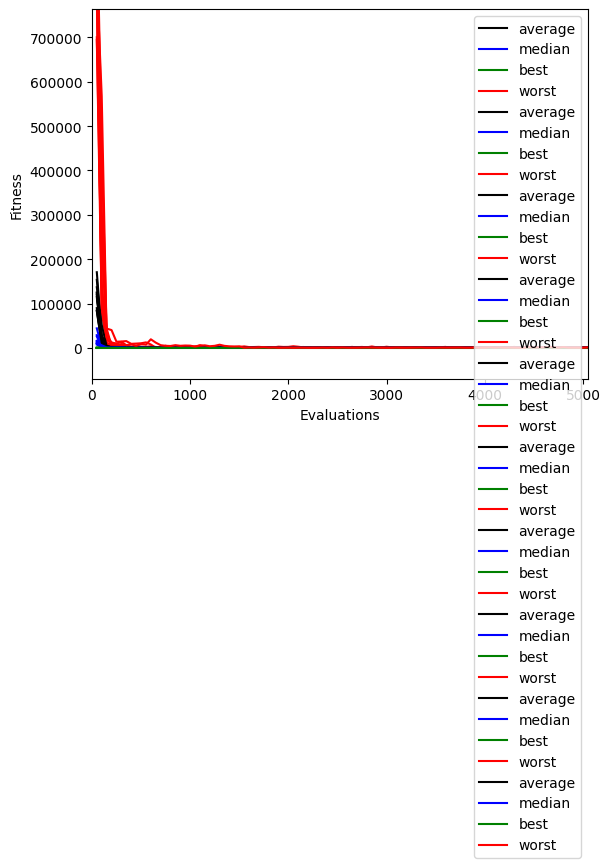

<Figure size 640x480 with 0 Axes>

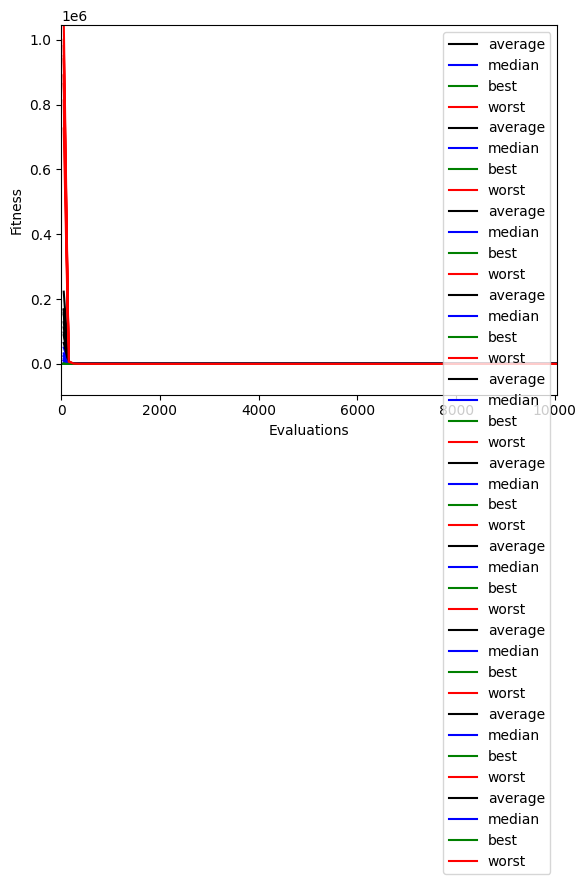

<Figure size 640x480 with 0 Axes>

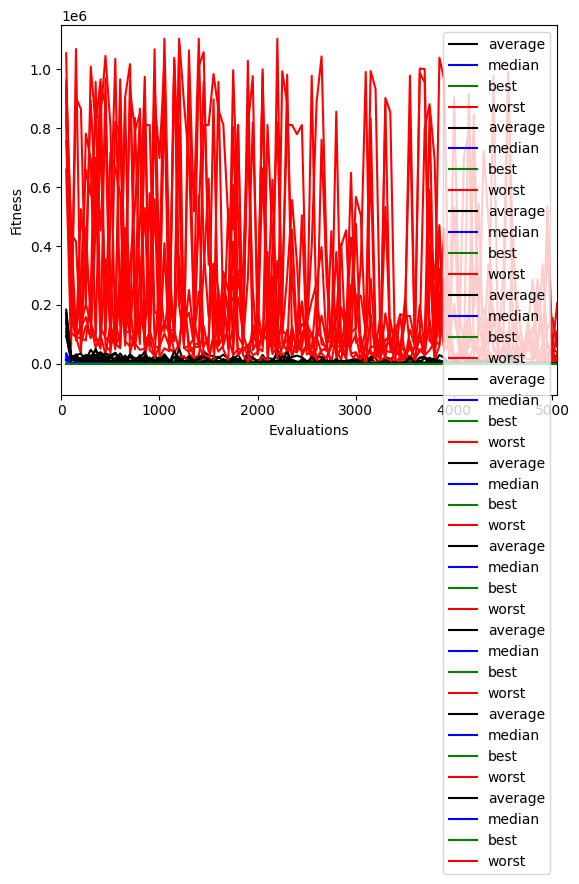

<Figure size 640x480 with 0 Axes>

In [3]:
# -*- coding: utf-8 -*-

from pylab import *
import sys
from inspyred import ec
from inspyred import benchmarks


from utils.utils_06.inspyred_utils import NumpyRandomWrapper
import utils.utils_06.ga as ga
import utils.utils_06.es as es
import utils.utils_06.pso as pso
"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

num_vars = 2 # Number of dimensions of the search space

args = {}

# the problem class
args["problem_class"] = benchmarks.Rosenbrock

# other problems to try,
# see  https://pythonhosted.org/inspyred/reference.html#module-inspyred.benchmarks

# unimodal
#benchmarks.Sphere
#benchmarks.Rosenbrock

# multimodal
#benchmarks.Griewank
#benchmarks.Ackley
#benchmarks.Rastrigin
#benchmarks.Schwefel

# common parameters
args["max_generations"] = 100 # Number of generations
args["pop_size"] = 50 # population size

# parameters for the GA
args["gaussian_stdev"] = 0.5 # Standard deviation of the Gaussian mutations
args["mutation_rate"] = 0.5 # fraction of loci to perform mutation on
args["tournament_size"] = 2
args["num_elites"] = 1 # number of elite individuals to maintain in each gen

# parameters for the ES
args["num_offspring"] = 100 #lambda
args["sigma"] = 1.0 # default standard deviation
args["strategy_mode"] = es.INDIVIDUAL # es.GLOBAL, es.INDIVIDUAL, None
args["mixing_number"] = 1 #rho

# parameters for the PSO
args["topology"] = pso.RING #pso.RING, pso.STAR
args["neighborhood_size"] = 5   #used only for the ring topology
args["inertia"] = 0.5
args["cognitive_rate"] = 2.1
args["social_rate"] = 2.1

"""
-------------------------------------------------------------------------
"""

display = True # Plot initial and final populations

rng = NumpyRandomWrapper()

ga_fitness = []
es_fitness = []
pso_fitness = []

for i in range(10):
    print("Iteration:", i)
    # Run GA
    args["fig_title"] = "GA"
    best_individual, best_fitness, final_pop = ga.run_ga(rng,num_vars=num_vars,
                                            display=display,use_log_scale=True,
                                            **args)
    # print("Best GA fitness:", best_fitness)
    ga_fitness.append(best_fitness)
    plt.clf()

    # Run ES
    args["fig_title"] = "ES"
    best_individual, best_fitness, final_pop = es.run_es(rng,num_vars=num_vars,
                                                display=display,use_log_scale=True,
                                                **args)
    # print("Best ES fitness:", best_fitness)
    es_fitness.append(best_fitness)
    plt.clf()

    args["fig_title"] = "PSO"
    best_individual, best_fitness, final_pop = pso.run_pso(rng,num_vars=num_vars,
                                                display=display,use_log_scale=True,
                                                **args)
    # print("Best PSO fitness:", best_fitness)
    pso_fitness.append(best_fitness)

    plt.clf()

# print avg fitness and std
print("GA fitness:", np.mean(ga_fitness), np.std(ga_fitness))
print("ES fitness:", np.mean(es_fitness), np.std(es_fitness))
print("PSO fitness:", np.mean(pso_fitness), np.std(pso_fitness))


# ioff()
# show()

## Exercise 3 (Optional)

Now that you have some intuition on how an existing implementation of PSO works (as well as the underlying biological inspiration), you might find useful implementing a PSO algorithm on your own (in Python or any other language of your choice). As we have seen in the lecture, this can be coded in just a few lines. If you want, try to implement a **simple** version of PSO (with the parametrization found in the previous exercise), to minimize for instance the Sphere function. You could also try to include some constraints and a constraint handling technique.


## Instructions and questions

Concisely note down your observations from the previous exercises (follow the bullet points) and think about the following questions. 

- When do you think it is useful to have a lower (higher) cognitive learning rate? What about the social learning rate?
- From a biological point of view, which neighborhood topology do you consider as the most plausible?
